### 1. 다양한 데이터 유형

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt

In [2]:
mtcars = pd.read_csv('https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv')
mtcars.rename(columns={'Unnamed: 0':'brand'}, inplace=True)

mtcars.head()


,brand,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


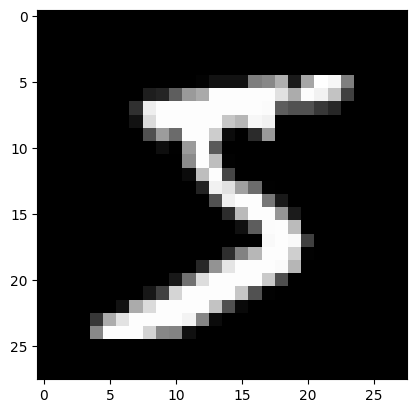

In [3]:
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()

train_images = (train_images.reshape(train_images.shape[0], 28, 28, 1)  
                            .astype('float32'))

sample = np.squeeze(train_images[0], axis = -1)
plt.imshow(sample, cmap = 'gray')

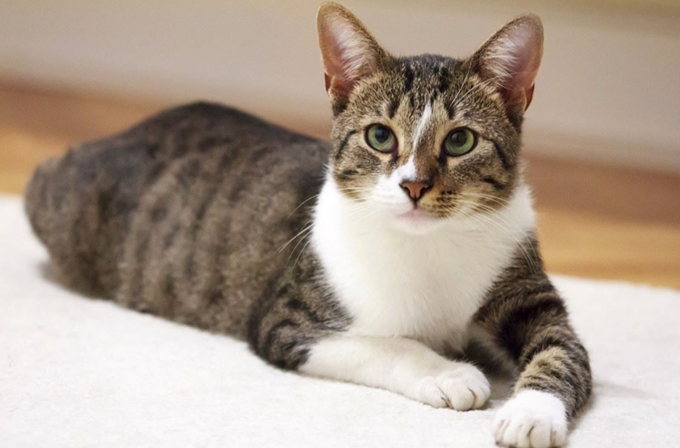

In [5]:
# 애옹
import matplotlib.image as mpimg
from PIL import Image
from copy import deepcopy

jpg_img = Image.open('data/cat.jpg')
jpg_img

In [8]:
# 행렬로 이미지를 봐야겠죠?
jpg_img_mat = mpimg.imread('data/cat.jpg')
print(type(jpg_img_mat))
print(jpg_img_mat.shape)

<class 'numpy.ndarray'>
(448, 680, 3)


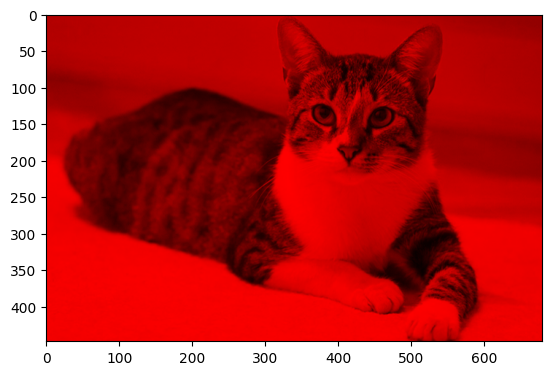

In [10]:
# 채널 분리하기
red_mat = deepcopy(jpg_img_mat)
red_mat[:, :, 1:3] = 0
plt.imshow(red_mat)


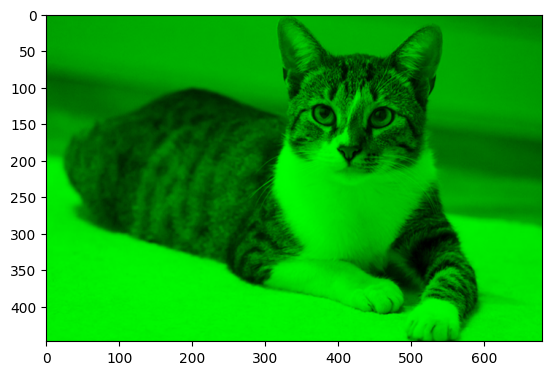

In [12]:
green_mat = deepcopy(jpg_img_mat)
green_mat[:, :, [0, 2]] = 0
plt.imshow(green_mat)

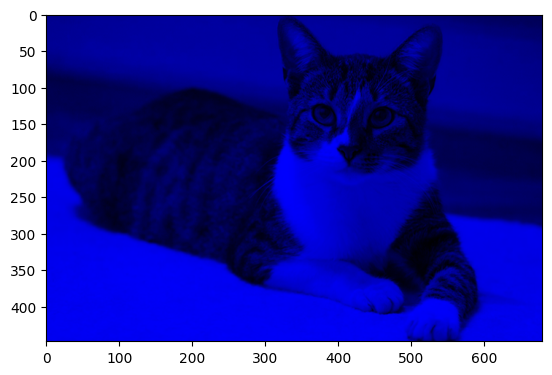

In [13]:
blue_mat = deepcopy(jpg_img_mat)
blue_mat[:, :, 0:2] = 0
plt.imshow(blue_mat)

## 음성 데이터
- `wave` format 데이터

In [16]:
import numpy as np
import matplotlib.pylab as plt 
from scipy.io import wavfile

# sample_rate는 wav 파일에 메타 데이터로 들어가 있다
sample_rate, data = wavfile.read('data/Fanfare60.wav')

print(sample_rate)
print(data[:44100]) # 만약 2채널이라면, 내가 가진 데이터와 달리 각 원소는 2개로 이뤄짐

# 강의 예제는 2채널이나, 내가 가져온 데이터는 1채널인 듯
print(data.shape)



22050
[  0   0   0 ... -18 -18 -18]
(1323000,)


array([      0,       1,       2, ..., 1322997, 1322998, 1322999])

- 관측 시간 구하기 : 즉 각 숫자가 어떤 시간에 측정되어 있는가를 보자

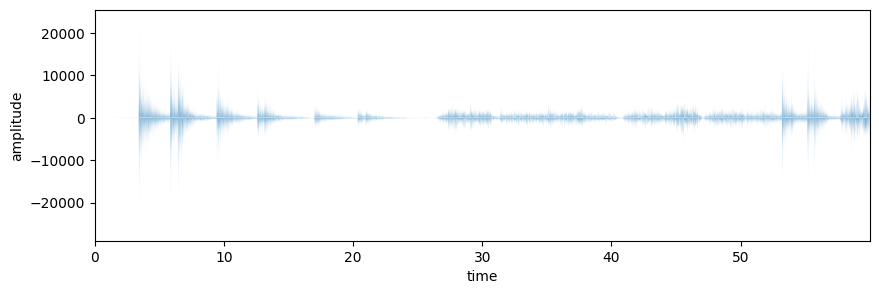

In [18]:
times = np.arange(len(data)) / float(sample_rate) # np.arange(len(data)) : 0부터 샘플레이트 * 전체 실행 시간까지의 숫자

# times의 각 원소는 인덱스 / 22050으로 나눈, '초' 단위가 됨

# 스펙트로그램
plt.figure(figsize = (10, 3))
plt.fill_between(times, data) # 2개의 선이 있으면 그 사이를 채워주는 함수임
plt.xlim(times[0], times[-1])
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()


### 텍스트 데이터

In [20]:
text = '기계학습 방법론 을 이해 하여 인공 지능 을 만들어 봅시다 .' 

text_tokenized = text.split(' ')

voca = {'.' : 0, '기계학습' : 1, '만들어' : 2, '방법론' : 3, '봅시다' : 4, '을' : 5, '이해': 6, '인공' : 7, '지능' : 8, '하여' : 9}

text_sequence = [voca.get(x) for x in text_tokenized]
text_sequence

[1, 3, 5, 6, 9, 7, 8, 5, 2, 4, 0]

In [21]:
voca_size = len(voca)
voca_size

10

In [26]:
import tensorflow as tf

one_hot = tf.keras.utils.to_categorical(text_sequence, num_classes = voca_size, dtype = 'int')
print(one_hot)

[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]
